In [0]:
import zipfile
 
zip_ref = zipfile.ZipFile("/gdrive/My Drive/footballers.zip")
zip_ref.extractall('/tmp')
zip_ref.close()

# **Dependencies**

In [0]:
import os
import cv2
import numpy as np
from PIL import Image
import pickle
from google.colab.patches import cv2_imshow

# **Recognizing Faces And Preparing Data for Training**

In [0]:
cascade_path = "haarcascade_frontalface_alt2.xml"
face_cascade = cv2.CascadeClassifier(cascade_path)
 
recognizer = cv2.face.LBPHFaceRecognizer_create()
 
current_id = 0
label_ids = {}
x_train = []
y_train = []
 
for root, dirs, files in os.walk('/tmp/footballers'):
  for file in files:
    if file.endswith("jpeg"):
      filepath = os.path.join(root, file)
      label = os.path.basename(os.path.dirname(filepath))
  
      if not label in label_ids:
        label_ids[label] = current_id
        current_id += 1
  
      id = label_ids[label]
 
      img = Image.open(filepath).convert("L")
      size = (500, 500)
      img = img.resize(size, Image.ANTIALIAS)
      img = np.array(img, np.uint8)
 
      faces = face_cascade.detectMultiScale(img, scaleFactor = 1.1, minNeighbors = 3)
      for (x, y, w, h) in faces:
        roi = img[y:y+h, x:x+w]
        x_train.append(img)
        y_train.append(id)
 
with open("labels.pickle", 'wb') as f:
  pickle.dump(label_ids, f)

# **Training**

In [0]:
recognizer.train(x_train, np.array(y_train))

recognizer.save("trainer.yml")

#**Recognizing Football Players on custom images using our trained model**

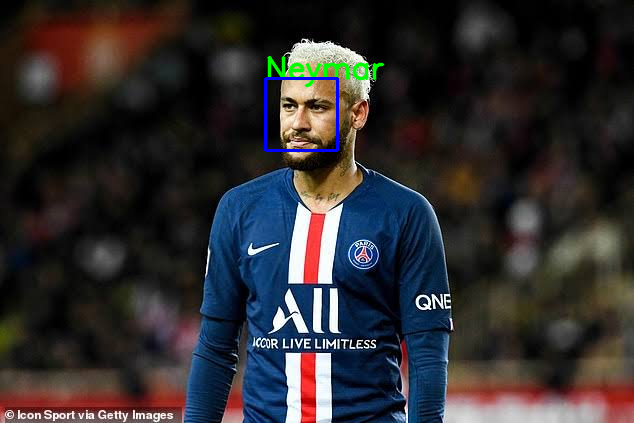

True

In [5]:
cascade_path = "haarcascade_frontalface_alt2.xml"
face_cascade = cv2.CascadeClassifier(cascade_path)
 
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read("trainer.yml")
 
labels = {}
 
with open("labels.pickle", 'rb') as f:
  label = pickle.load(f)
  labels = {v:k for k, v in label.items()}
 
img = cv2.imread("/images1.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors = 3)
 
for (x, y, w, h) in faces:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
 
  id, conf = recognizer.predict(roi_gray)
 
  if conf >= 50:
    # printing the label
    font = cv2.FONT_HERSHEY_SIMPLEX
    name = labels[id]
    color = (0, 255, 0)
    stroke = 2
 
    cv2.putText(img, name, (x, y), font, 1, color, stroke, cv2.LINE_AA)
 
  # drawing the rectangle
  color = (255, 0, 0)
  
  width = x + w
  height = y + h
 
  cv2.rectangle(img, (x, y), (width, height), color, stroke)
 
cv2_imshow(img)
cv2.imwrite("output1.jpg", img)